In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

639

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | la argentina
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | kavieng
Processing Record 7 of Set 1 | roald
Processing Record 8 of Set 1 | nerchinskiy zavod
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | jalu
Processing Record 11 of Set 1 | luderitz
Processing Record 12 of Set 1 | los llanos de aridane
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | yenagoa
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | laguna
Processing Record 19 of Set 1 | ouadda
Processing Record 20 of Set 1 | idrinskoye
Processing Record 21 of Set 1 | san patricio
Processing Record 22 of Set 1 | misratah

Processing Record 36 of Set 4 | belawan
Processing Record 37 of Set 4 | bethel
Processing Record 38 of Set 4 | okhotsk
Processing Record 39 of Set 4 | tilichiki
Processing Record 40 of Set 4 | atambua
Processing Record 41 of Set 4 | portland
Processing Record 42 of Set 4 | sitamarhi
Processing Record 43 of Set 4 | palmerston
Processing Record 44 of Set 4 | cabo san lucas
Processing Record 45 of Set 4 | hilo
Processing Record 46 of Set 4 | clyde river
Processing Record 47 of Set 4 | anloga
Processing Record 48 of Set 4 | yudong
Processing Record 49 of Set 4 | hengshui
Processing Record 50 of Set 4 | chingola
Processing Record 1 of Set 5 | constitucion
Processing Record 2 of Set 5 | dakoro
Processing Record 3 of Set 5 | carnarvon
Processing Record 4 of Set 5 | northam
Processing Record 5 of Set 5 | santiago
Processing Record 6 of Set 5 | victoria
Processing Record 7 of Set 5 | esik
Processing Record 8 of Set 5 | vagay
Processing Record 9 of Set 5 | alotau
City not found. Skipping...
Proc

City not found. Skipping...
Processing Record 23 of Set 8 | beyneu
Processing Record 24 of Set 8 | newcastle
Processing Record 25 of Set 8 | bud
Processing Record 26 of Set 8 | samusu
City not found. Skipping...
Processing Record 27 of Set 8 | sanming
Processing Record 28 of Set 8 | blagoveshchenka
Processing Record 29 of Set 8 | wahran
City not found. Skipping...
Processing Record 30 of Set 8 | las vegas
Processing Record 31 of Set 8 | saint-francois
Processing Record 32 of Set 8 | jining
Processing Record 33 of Set 8 | guanare
Processing Record 34 of Set 8 | shelton
Processing Record 35 of Set 8 | brigantine
Processing Record 36 of Set 8 | natal
Processing Record 37 of Set 8 | issa
Processing Record 38 of Set 8 | taburi
City not found. Skipping...
Processing Record 39 of Set 8 | mehamn
Processing Record 40 of Set 8 | mangalia
Processing Record 41 of Set 8 | kenai
Processing Record 42 of Set 8 | esperance
Processing Record 43 of Set 8 | lagoa
Processing Record 44 of Set 8 | fare
Proce

Processing Record 8 of Set 12 | grand-santi
Processing Record 9 of Set 12 | moncao
Processing Record 10 of Set 12 | mapiri
Processing Record 11 of Set 12 | rio grande city
Processing Record 12 of Set 12 | tokur
Processing Record 13 of Set 12 | praia
Processing Record 14 of Set 12 | martin
Processing Record 15 of Set 12 | anadyr
Processing Record 16 of Set 12 | shumskiy
Processing Record 17 of Set 12 | tiznit
Processing Record 18 of Set 12 | bursol
City not found. Skipping...
Processing Record 19 of Set 12 | zvishavane
Processing Record 20 of Set 12 | coolum beach
Processing Record 21 of Set 12 | petropavl
Processing Record 22 of Set 12 | manacor
Processing Record 23 of Set 12 | new ulm
Processing Record 24 of Set 12 | lewistown
Processing Record 25 of Set 12 | rypefjord
Processing Record 26 of Set 12 | igarka
Processing Record 27 of Set 12 | sestri levante
Processing Record 28 of Set 12 | okha
Processing Record 29 of Set 12 | goundam
Processing Record 30 of Set 12 | sabya
Processing Re

In [7]:
len(city_data)

574

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,26.46,82,92,3.96,RU,2021-05-22 22:58:18
1,Atuona,-9.8000,-139.0333,80.22,68,35,15.12,PF,2021-05-22 22:57:53
2,La Argentina,2.1961,-75.9800,64.72,94,87,2.42,CO,2021-05-22 23:01:40
3,Ribeira Grande,38.5167,-28.7000,59.61,63,8,9.35,PT,2021-05-22 22:57:16
4,Kavieng,-2.5744,150.7967,83.21,76,100,0.38,PG,2021-05-22 22:57:19
5,Roald,62.5833,6.1333,52.90,93,90,8.05,NO,2021-05-22 23:01:40
6,Nerchinskiy Zavod,51.3088,119.6100,35.46,97,100,6.40,RU,2021-05-22 23:01:40
7,Bluff,-46.6000,168.3333,49.80,80,16,12.30,NZ,2021-05-22 23:01:41
8,Jalu,29.0331,21.5482,74.79,20,0,5.84,LY,2021-05-22 22:58:34
9,Luderitz,-26.6481,15.1594,67.08,43,19,4.03,NA,2021-05-22 23:01:41


In [9]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2021-05-22 22:58:18,71.6872,128.8694,26.46,82,92,3.96
1,Atuona,PF,2021-05-22 22:57:53,-9.8000,-139.0333,80.22,68,35,15.12
2,La Argentina,CO,2021-05-22 23:01:40,2.1961,-75.9800,64.72,94,87,2.42
3,Ribeira Grande,PT,2021-05-22 22:57:16,38.5167,-28.7000,59.61,63,8,9.35
4,Kavieng,PG,2021-05-22 22:57:19,-2.5744,150.7967,83.21,76,100,0.38


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

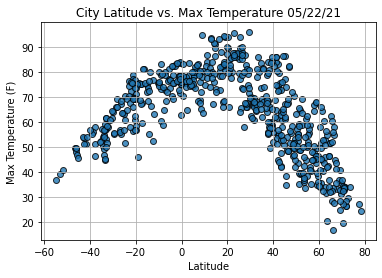

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

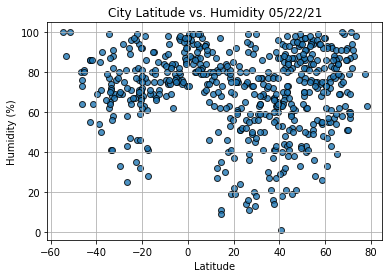

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

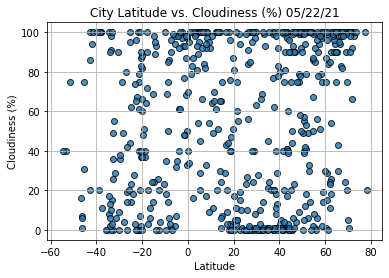

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

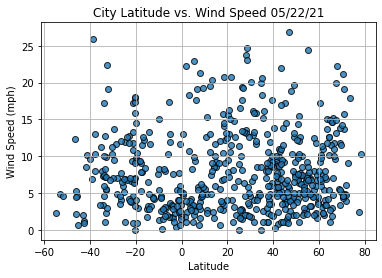

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                    Mahebourg
Country                        MU
Date          2021-05-22 23:01:05
Lat                      -20.4081
Lng                          57.7
Max Temp                    69.26
Humidity                       70
Cloudiness                     87
Wind Speed                   17.9
Name: 13, dtype: object

In [19]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
569     True
570     True
571    False
572     True
573    False
Name: Lat, Length: 574, dtype: bool

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2021-05-22 22:58:18,71.6872,128.8694,26.46,82,92,3.96
2,La Argentina,CO,2021-05-22 23:01:40,2.1961,-75.9800,64.72,94,87,2.42
3,Ribeira Grande,PT,2021-05-22 22:57:16,38.5167,-28.7000,59.61,63,8,9.35
5,Roald,NO,2021-05-22 23:01:40,62.5833,6.1333,52.90,93,90,8.05
6,Nerchinskiy Zavod,RU,2021-05-22 23:01:40,51.3088,119.6100,35.46,97,100,6.40


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

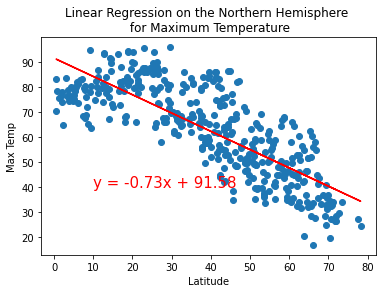

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

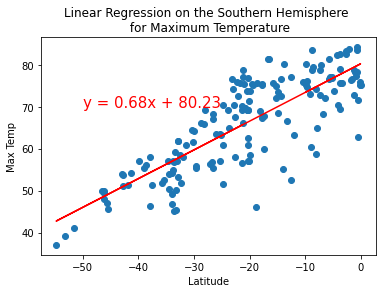

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,70))

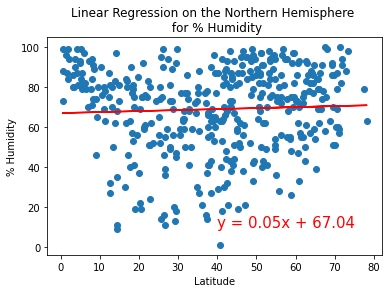

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

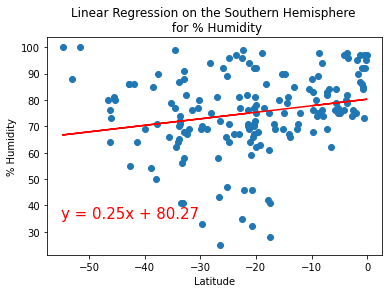

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,35))

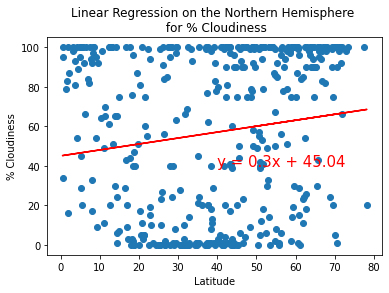

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,40))

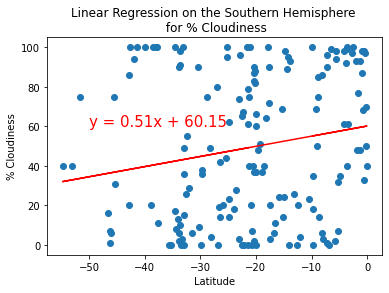

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

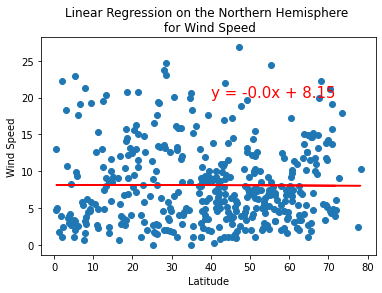

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,20))

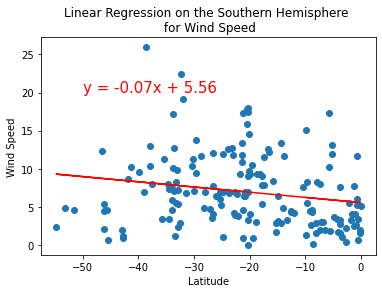

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))